# Introduction to Neural Networks

## Import packages

In [1]:
#! pip install keras

In [2]:
#!pip install tensorflow

In [33]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Input

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Understanding the image data format

In [5]:
print(type(X_train),X_train.shape)
print(type(X_test),X_test.shape)

<class 'numpy.ndarray'> (60000, 28, 28)
<class 'numpy.ndarray'> (10000, 28, 28)


In [6]:
print(type(y_train),y_train.shape)
print(type(y_test),y_test.shape)

<class 'numpy.ndarray'> (60000,)
<class 'numpy.ndarray'> (10000,)


In [7]:
X_train[0].shape

(28, 28)

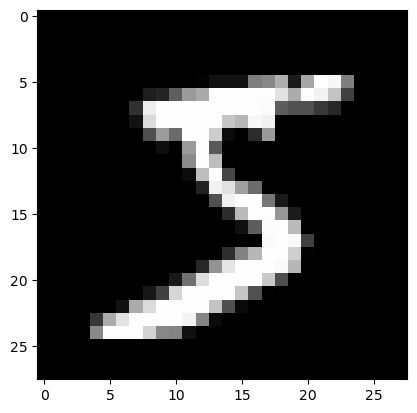

In [8]:
plt.imshow(X_train[0], cmap ='gray')

In [9]:
y_train[0]

5

## Preprocessing the image data

In [10]:
image_height, image_width = 28,28

In [11]:
X_train = X_train.reshape(60000, image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)

In [12]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [13]:
print(X_train[0])
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [14]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [15]:
y_train.shape

(60000,)

In [16]:
y_train[0]

5

In [17]:
y_test.shape

(10000,)

In [18]:
y_test[0]

7

In [19]:
y_train = to_categorical(y_train, 10)

In [20]:
y_train.shape

(60000, 10)

In [21]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [22]:
y_test = to_categorical(y_test, 10)

In [23]:
y_test.shape

(10000, 10)

In [24]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

## Build a model

<div style="text-align: center;">
    <img src="./images/neural-net.png" alt="Neural Network" style="max-width: 80%; height: auto;">
</div>


In [34]:
model = Sequential()

In [35]:
model.add(Input(shape=(784,))) 
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))

## Compile the model

In [36]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [37]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

784 pixels x 512 nodes +512 bias  for first layer

In [43]:
first_layer  = 784*512+ 512
first_layer

401920

512 nodes x 512 nodes + 512 bias for second layer

In [44]:
second_layer  = 512*512+512
second_layer

262656

512 nodes X 10 outputs + 10 bias

In [45]:
third_layer = 512*10+10
third_layer

5130

In [47]:
total = first_layer+second_layer+third_layer
total

669706

## Train the model

In [48]:
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_test, y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9049 - loss: 0.3087 - val_accuracy: 0.9675 - val_loss: 0.1055
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9747 - loss: 0.0831 - val_accuracy: 0.9721 - val_loss: 0.0847
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9840 - loss: 0.0516 - val_accuracy: 0.9765 - val_loss: 0.0764
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9882 - loss: 0.0380 - val_accuracy: 0.9780 - val_loss: 0.0722
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9912 - loss: 0.0273 - val_accuracy: 0.9782 - val_loss: 0.0812
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9912 - loss: 0.0271 - val_accuracy: 0.9778 - val_loss: 0.0868
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9920 - loss: 0.0251 - val_accuracy: 0.9829 - val_loss: 0.0692
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9948 - loss: 0.016

## What is the accuracy of the model?

### Plot the accuracy of the training model

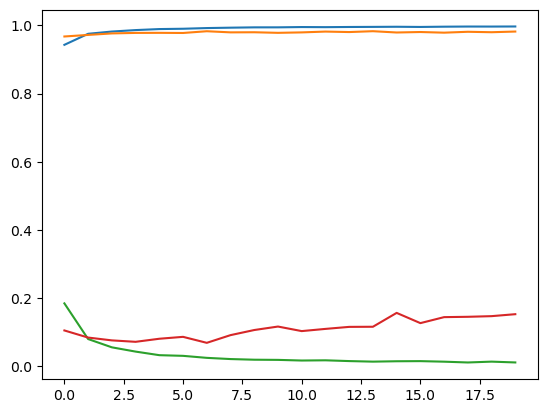

In [52]:
plt.plot(history.history['accuracy'], label = "Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Test accuracy")
plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Train loss")
plt.show()

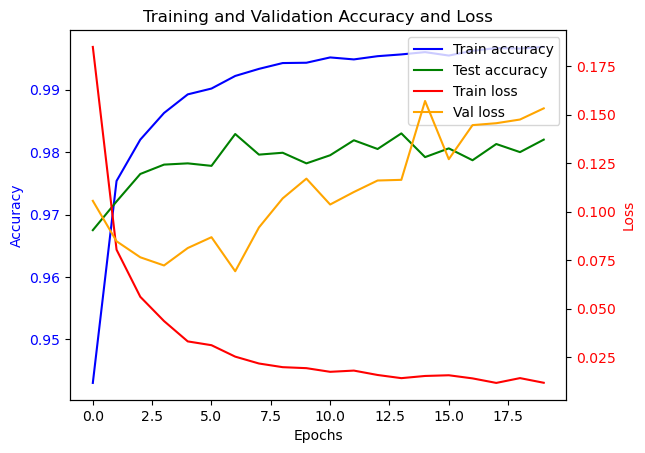

In [56]:
# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Plot accuracy on the primary y-axis
ax1.plot(history.history['accuracy'], label='Train accuracy', color='b')
ax1.plot(history.history['val_accuracy'], label='Test accuracy', color='g')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis to plot loss
ax2 = ax1.twinx()  
ax2.plot(history.history['loss'], label='Train loss', color='r')
ax2.plot(history.history['val_loss'], label='Val loss', color='orange')
ax2.set_ylabel('Loss', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Show the plot
plt.title('Training and Validation Accuracy and Loss')
plt.show()


In [54]:
score = model.evaluate(X_test, y_test)
score

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9787 - loss: 0.1794


[0.15322887897491455, 0.9819999933242798]

### Plot the accuracy of training and validation set

### Accuracy of training and validation with loss

## Run a prediction

## Experiment further
- What results do you get with a model with more than 2 hidden layers and more/less neurons
- What results do you get when trying to use another activation function?

# Convolution Neural Network

## Import the libraries

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

## Load the data

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

## Pre-processing

In [ ]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)

batch_size = 128
num_classes = 10
epochs = 3

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

## Use the model

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3,3),input_shape=(28,28,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(32, kernel_size=(3,3),padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn.summary())

In [ ]:
history_cnn = cnn.fit(X_train,y_train,epochs=20,verbose=1,validation_data=(X_train,y_train))

Recall that when using neural networks we got good accuracy.

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

Comparing this to using CNNs - the performance is far superior.

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc'])

## Not related just testing out files

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data/olympics.csv',skiprows=4)
df.head()